##### Required to use command line to run the code

In [1]:
# the dataset's sources coming from this torrents
# https://academictorrents.com/details/56aa49f9653ba545f48df2e33679f014d2829c10

# decompress the zst data
# zstd -d --memory=2048MB RC_2010-04.zst (normally, we will replace the "RC_2010-04" into * for decompressing every zst file within the folder)

# use this code in command line for spliting the decompressed data into several small file then only load into python (need to apply to teenager and hiphophead decompressed data due to memoy problem while loading into python code)
# split -b 1048576000 teenagers_comments data_part_

# Loading the decompressed data

##### Function for loading the data (almost the clean code) into partition datasets and filtering them with important variables and timeframe

In [1]:
# loading the decompressed data (comments dataset) into python code
import os
import re
import json
import pandas as pd

In [2]:
def data_collection_comments(decompressed_data):
    base_path = "/home/haters/Downloads/temp_data"
    dir_path = os.path.join(base_path, decompressed_data, "Comments")
    output_dir = os.path.join(base_path, "loaded_data", decompressed_data, "comments")

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    file_name_comments = os.listdir(dir_path)
    comments_columns = ["body", "subreddit", "link_id", "retrieved_on"]
    start_date = pd.Timestamp("2023-01-01")
    end_date = pd.Timestamp("2023-12-31")

    chunksize = 1000000  # Define a suitable chunk size
    files_per_iteration = len(file_name_comments) // 5

    for iteration in range(1, 6):
        data_dicts_comments = []
        start_index = files_per_iteration * (iteration - 1)
        end_index = start_index + files_per_iteration if iteration < 5 else len(file_name_comments)
        
        for file_name in file_name_comments[start_index:end_index]:
            if 'Teenagers' in file_name or 'Music' in file_name or 'Hiphopheads' in file_name:
                print(f"Skipping file: {file_name}")
                continue
                
            file_path = os.path.join(dir_path, file_name)
            
            with open(file_path, 'r') as file:
                # data_dicts_comments = []
                chunk_lines = []
    
                for line_number, line in enumerate(file, 1):
                    chunk_lines.append(line)
                    if line_number % chunksize == 0:
                        data_dicts_comments.extend(process_chunk(chunk_lines, comments_columns))
                        # save_data(data_dicts_comments, decompressed_data, output_dir, comments_columns, start_date, end_date, iteration)
                        chunk_lines = []  # Reset for next chunk
    
                if chunk_lines:  # Process any remaining lines
                    data_dicts_comments.extend(process_chunk(chunk_lines, comments_columns))
                    # save_data(data_dicts_comments, decompressed_data, output_dir, comments_columns, start_date, end_date, iteration)
                print(f'completed file name::: {file_name}')
        save_data(data_dicts_comments, decompressed_data, output_dir, comments_columns, start_date, end_date, iteration, file_name)

def process_chunk(lines, columns):
    data_dicts = []
    for line in lines:
        try:
            # Load the line as a JSON object
            data_dict = json.loads(line)
            
            filtered_dict = {col: data_dict.get(col) for col in columns}  # Filter dict based on columns
            data_dicts.append(filtered_dict)
        except json.JSONDecodeError:
            print(f"Error parsing line: {line}")
    return data_dicts

def save_data(data_dicts, decompressed_data, output_dir, columns, start_date, end_date, iteration, file_name):
    loaded_dataset = pd.DataFrame(data_dicts)
    loaded_dataset = loaded_dataset[columns]
    loaded_dataset['retrieved_on'] = pd.to_datetime(loaded_dataset['retrieved_on'], unit='s')
    filtered_chunk = loaded_dataset[(loaded_dataset['retrieved_on'] >= start_date) & (loaded_dataset['retrieved_on'] <= end_date)]
    # csv_path = os.path.join(output_dir, f"{decompressed_data}_test_{iteration}.csv")
    # filtered_chunk.to_csv(csv_path, index=False)
    
    # Debugging output to monitor rows
    print(filtered_chunk.info())

In [3]:
import os
import json
import pandas as pd

def data_collection_submissions(decompressed_data):
    base_path = "/home/haters/Downloads/temp_data"
    dir_path = os.path.join(base_path, decompressed_data, "Submissions")
    output_dir = os.path.join(base_path, "loaded_data", decompressed_data, "submissions")

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    file_name_submissions = os.listdir(dir_path)
    submissions_columns = ["selftext", "url", "title", "subreddit", "name", "permalink", "created_utc"]
    start_date = pd.Timestamp("2023-01-01")
    end_date = pd.Timestamp("2023-12-31")

    chunksize = 1000000  # Define a suitable chunk size
    files_per_iteration = len(file_name_submissions) // 5

    for iteration in range(1, 6):
        data_dicts_submissions = []
        start_index = files_per_iteration * (iteration - 1)
        end_index = start_index + files_per_iteration if iteration < 5 else len(file_name_submissions)

        for file_name in file_name_submissions[start_index:end_index]:
            if 'Teenagers' in file_name or 'Music' in file_name or 'Hiphopheads' in file_name:
                print(f"Skipping file: {file_name}")
                continue

            file_path = os.path.join(dir_path, file_name)
            with open(file_path, 'r') as file:
                chunk_lines = []

                for line_number, line in enumerate(file, 1):
                    chunk_lines.append(line)
                    if line_number % chunksize == 0:
                        data_dicts_submissions.extend(process_chunk(chunk_lines, submissions_columns))
                        save_data(data_dicts_submissions, decompressed_data, output_dir, submissions_columns, start_date, end_date, iteration, file_name)
                        data_dicts_submissions = []  # Reset for next chunk

                if chunk_lines:  # Process any remaining lines
                    data_dicts_submissions.extend(process_chunk(chunk_lines, submissions_columns))
                    save_data(data_dicts_submissions, decompressed_data, output_dir, submissions_columns, start_date, end_date, iteration, file_name)

def process_chunk(lines, columns):
    data_dicts = []
    for line in lines:
        try:
            # Load the line as a JSON object
            data_dict = json.loads(line)
            
            filtered_dict = {col: data_dict.get(col) for col in columns}  # Filter dict based on columns
            data_dicts.append(filtered_dict)
        except json.JSONDecodeError:
            print(f"Error parsing line: {line}")
    return data_dicts

def save_data(data_dicts, decompressed_data, output_dir, columns, start_date, end_date, iteration, file_name):
    try:
        loaded_dataset = pd.DataFrame(data_dicts)
        loaded_dataset = loaded_dataset[columns]
        loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')
        filtered_chunk = loaded_dataset[(loaded_dataset['created_utc'] >= start_date) & (loaded_dataset['created_utc'] <= end_date)]
        # csv_path = os.path.join(output_dir, f"{decompressed_data}_submissions_{iteration}.csv")
        # filtered_chunk.to_csv(csv_path, index=False)
        
        # for checking the data
        csv_path = os.path.join(output_dir, f"{decompressed_data}_submissions_sample_{iteration}.csv")
        # Convert the data into csv
        # filtered_chunk.to_csv(csv_path, index=False)
    
        # Debugging output to monitor rows
        print(filtered_chunk.info())
    except Exception as e: 
        print(f"Failed to process {file_name}: {str(e)}")


In [4]:
data_collection_comments("Male_Decompressed_Data")

completed file name::: ImagineDragonsTeens_comments
completed file name::: larrystylinson_comments
Failed to process larrystylinson_comments: 'created_utc'
completed file name::: JUSTINBIEBER_comments
completed file name::: bts7_comments
Failed to process bts7_comments: 'created_utc'
completed file name::: EdSheeran_comments
completed file name::: BtsMemes_comments
Failed to process BtsMemes_comments: 'created_utc'
completed file name::: BTSWorld_comments
completed file name::: KanyeLeaks_comments
Failed to process KanyeLeaks_comments: 'created_utc'
completed file name::: BadBunnyPR_comments
completed file name::: DrakeTheType_comments
completed file name::: TheWeeknd_comments
completed file name::: harrystyles_comments
completed file name::: PostMalone_comments
Failed to process PostMalone_comments: 'created_utc'


In [5]:
data_collection_comments("Related_Decompressed_Data")

completed file name::: CelebsPH_comments
completed file name::: Celebs_comments
completed file name::: CelebrityTributes_comments
completed file name::: CelebrityMommy_comments
completed file name::: KpopArmpit_comments
completed file name::: popculturechat_comments
completed file name::: CelebRoleplay_comments
Skipping file: Music_comments
completed file name::: Celebswithbigtits_comments
completed file name::: celebrity_soles_comments
completed file name::: KpopFantasies_comments
completed file name::: CelebrityFeetPosts_comments
completed file name::: CelebrityCumTributes_comments
completed file name::: KpopImagines_comments
completed file name::: CelebrityNumberSix_comments
completed file name::: kpopforsale_comments
Failed to process kpopforsale_comments: 'created_utc'
completed file name::: CelebBattles_comments
completed file name::: CelebrityPokies_comments
completed file name::: CelebRoleP_comments
completed file name::: CelebrityPenis_comments
completed file name::: celebrity

IsADirectoryError: [Errno 21] Is a directory: '/home/haters/Downloads/temp_data/Related_Decompressed_Data/Comments/.ipynb_checkpoints'

In [6]:
data_collection_submissions("Male_Decompressed_Data")

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 10548 entries, 25409 to 35956
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     10548 non-null  object        
 1   url          10548 non-null  object        
 2   title        10548 non-null  object        
 3   subreddit    10548 non-null  object        
 4   name         10548 non-null  object        
 5   permalink    10548 non-null  object        
 6   created_utc  10548 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 659.2+ KB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 13635 entries, 25409 to 57421
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     13635 non-null  object        
 1   url          13635 non-null  object        
 2   title        13635 non-null  object        
 3   subreddit    13635 non-null  object        
 4   name         13635 non-null  object        
 5   permalink    13635 non-null  object        
 6   created_utc  13635 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 852.2+ KB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')
/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 24981 to 31352
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     6372 non-null   object        
 1   url          6372 non-null   object        
 2   title        6372 non-null   object        
 3   subreddit    6372 non-null   object        
 4   name         6372 non-null   object        
 5   permalink    6372 non-null   object        
 6   created_utc  6372 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 398.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 24981 to 31352
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     6372 non-null   object        
 1   url          6372 non-null   object        
 2   title        6372 non-null   object        
 3   subreddit    6372 non-null   ob

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')
/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 3933 entries, 9160 to 13092
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     3933 non-null   object        
 1   url          3933 non-null   object        
 2   title        3933 non-null   object        
 3   subreddit    3933 non-null   object        
 4   name         3933 non-null   object        
 5   permalink    3933 non-null   object        
 6   created_utc  3933 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 245.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 4693 entries, 9160 to 21255
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     4693 non-null   object        
 1   url          4693 non-null   object        
 2   title        4693 non-null   object        
 3   subreddit    4693 non-null   obje

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 8171 entries, 15151 to 36557
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     8171 non-null   object        
 1   url          8171 non-null   object        
 2   title        8171 non-null   object        
 3   subreddit    8171 non-null   object        
 4   name         8171 non-null   object        
 5   permalink    8171 non-null   object        
 6   created_utc  8171 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 510.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 29557 entries, 15151 to 192494
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     29557 non-null  object        
 1   url          29557 non-null  object        
 2   title        29557 non-null  object        
 3   subreddit    29557 non-null  

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


In [7]:
data_collection_submissions("Female_Decompressed_Data")

<class 'pandas.core.frame.DataFrame'>
Index: 3006 entries, 7223 to 10228
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     3006 non-null   object        
 1   url          3006 non-null   object        
 2   title        3006 non-null   object        
 3   subreddit    3006 non-null   object        
 4   name         3006 non-null   object        
 5   permalink    3006 non-null   object        
 6   created_utc  3006 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 187.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 9132 entries, 7223 to 34483
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     9132 non-null   object        
 1   url          9132 non-null   object        
 2   title        9132 non-null   object        
 3   subreddit    9132 non-null   obje

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')
/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 27746 entries, 7223 to 76654
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     27746 non-null  object        
 1   url          27746 non-null  object        
 2   title        27746 non-null  object        
 3   subreddit    27746 non-null  object        
 4   name         27746 non-null  object        
 5   permalink    27746 non-null  object        
 6   created_utc  27746 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.7+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 33018 entries, 7223 to 87289
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     33018 non-null  object        
 1   url          33018 non-null  object        
 2   title        33018 non-null  object        
 3   subreddit    33018 non-null  object        
 4   name         33018 non-null  object        
 5   permalink    33018 non-null  object        
 6   created_utc  33018 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2291 entries, 444 to 2734
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     2291 non-null   object        
 1   url          2291 non-null   object        
 2   title        2291 non-null   object        
 3   subreddit    2291 non-null   object 

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')
/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 21317 entries, 444 to 35784
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     21317 non-null  object        
 1   url          21317 non-null  object        
 2   title        21317 non-null  object        
 3   subreddit    21317 non-null  object        
 4   name         21317 non-null  object        
 5   permalink    21317 non-null  object        
 6   created_utc  21317 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 21317 entries, 444 to 35784
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     21317 non-null  object        
 1   url          21317 non-null  object        
 2   title        21317 non-null  object        
 3   subreddit    21317 non-null  object

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 23604 entries, 444 to 46765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     23604 non-null  object        
 1   url          23604 non-null  object        
 2   title        23604 non-null  object        
 3   subreddit    23604 non-null  object        
 4   name         23604 non-null  object        
 5   permalink    23604 non-null  object        
 6   created_utc  23604 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.4+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 37313 entries, 444 to 103978
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     37313 non-null  object        
 1   url          37313 non-null  object        
 2   title        37313 non-null  object        
 3   subreddit    37313 non-null  object        
 4   name         37313 non-null  object        
 5   permalink    37313 non-null  object        
 6   created_utc  37313 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2049 entries, 13022 to 15070
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     2049 non-null   object        
 1   url          2049 non-null   object        
 2   title        2049 non-null   object        
 3   subreddit    2049 non-null   obje

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 6587 entries, 13022 to 72606
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     6587 non-null   object        
 1   url          6587 non-null   object        
 2   title        6587 non-null   object        
 3   subreddit    6587 non-null   object        
 4   name         6371 non-null   object        
 5   permalink    6587 non-null   object        
 6   created_utc  6587 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 411.7+ KB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 89601 entries, 13022 to 319523
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     89601 non-null  object        
 1   url          89601 non-null  object        
 2   title        89601 non-null  object        
 3   subreddit    89601 non-null  object        
 4   name         89385 non-null  object        
 5   permalink    89601 non-null  object        
 6   created_utc  89601 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 5.5+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 93799 entries, 13022 to 357752
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     93799 non-null  object        
 1   url          93799 non-null  object        
 2   title        93799 non-null  object        
 3   subreddit    93799 non-null  object        
 4   name         93583 non-null  object        
 5   permalink    93799 non-null  object        
 6   created_utc  93799 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 5.7+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 99543 entries, 13022 to 375592
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     99543 non-null  object        
 1   url          99543 non-null  object        
 2   title        99543 non-null  object        
 3   subreddit    99543 non-null  object        
 4   name         99327 non-null  object        
 5   permalink    99543 non-null  object        
 6   created_utc  99543 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 6.1+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 3731 entries, 30686 to 34416
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     3731 non-null   object        
 1   url          3731 non-null   object        
 2   title        3731 non-null   object        
 3   subreddit    3731 non-null   object        
 4   name         3731 non-null   object        
 5   permalink    3731 non-null   object        
 6   created_utc  3731 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 233.2+ KB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')
/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 8684 entries, 30686 to 58823
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     8684 non-null   object        
 1   url          8684 non-null   object        
 2   title        8684 non-null   object        
 3   subreddit    8684 non-null   object        
 4   name         8684 non-null   object        
 5   permalink    8684 non-null   object        
 6   created_utc  8684 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 542.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 10595 entries, 30686 to 65151
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     10595 non-null  object        
 1   url          10595 non-null  object        
 2   title        10595 non-null  object        
 3   subreddit    10595 non-null  o

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 10595 entries, 30686 to 65151
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     10595 non-null  object        
 1   url          10595 non-null  object        
 2   title        10595 non-null  object        
 3   subreddit    10595 non-null  object        
 4   name         10595 non-null  object        
 5   permalink    10595 non-null  object        
 6   created_utc  10595 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 662.2+ KB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')
/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 18388 entries, 30686 to 82627
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     18388 non-null  object        
 1   url          18388 non-null  object        
 2   title        18388 non-null  object        
 3   subreddit    18388 non-null  object        
 4   name         18388 non-null  object        
 5   permalink    18388 non-null  object        
 6   created_utc  18388 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 21310 entries, 30686 to 85742
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     21310 non-null  object        
 1   url          21310 non-null  object        
 2   title        21310 non-null  object        
 3   subreddit    21310 non-null  ob

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')
/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 11458 to 12409
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     952 non-null    object        
 1   url          952 non-null    object        
 2   title        952 non-null    object        
 3   subreddit    952 non-null    object        
 4   name         952 non-null    object        
 5   permalink    952 non-null    object        
 6   created_utc  952 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 59.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2451 entries, 11458 to 15157
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     2451 non-null   object        
 1   url          2451 non-null   object        
 2   title        2451 non-null   object        
 3   subreddit    2451 non-null   obje

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')
/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 3543 entries, 11458 to 28017
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     3543 non-null   object        
 1   url          3543 non-null   object        
 2   title        3543 non-null   object        
 3   subreddit    3543 non-null   object        
 4   name         3543 non-null   object        
 5   permalink    3543 non-null   object        
 6   created_utc  3543 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 221.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 4493 entries, 11458 to 36232
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     4493 non-null   object        
 1   url          4493 non-null   object        
 2   title        4493 non-null   object        
 3   subreddit    4493 non-null   ob

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 8099 entries, 11458 to 54670
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     8099 non-null   object        
 1   url          8099 non-null   object        
 2   title        8099 non-null   object        
 3   subreddit    8099 non-null   object        
 4   name         8099 non-null   object        
 5   permalink    8099 non-null   object        
 6   created_utc  8099 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 506.2+ KB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 11266 entries, 11458 to 76212
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     11266 non-null  object        
 1   url          11266 non-null  object        
 2   title        11266 non-null  object        
 3   subreddit    11266 non-null  object        
 4   name         11266 non-null  object        
 5   permalink    11266 non-null  object        
 6   created_utc  11266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 704.1+ KB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 32320 entries, 11458 to 97295
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     32320 non-null  object        
 1   url          32320 non-null  object        
 2   title        32320 non-null  object        
 3   subreddit    32320 non-null  object        
 4   name         32320 non-null  object        
 5   permalink    32320 non-null  object        
 6   created_utc  32320 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 2.0+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 35643 entries, 11458 to 104460
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     35643 non-null  object        
 1   url          35643 non-null  object        
 2   title        35643 non-null  object        
 3   subreddit    35643 non-null  object        
 4   name         35643 non-null  object        
 5   permalink    35643 non-null  object        
 6   created_utc  35643 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 2.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 36657 entries, 11458 to 109368
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     36657 non-null  object        
 1   url          36657 non-null  object        
 2   title        36657 non-null  object        
 3   subreddit    36657 non-null  

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


In [8]:
data_collection_submissions("Related_Decompressed_Data")

<class 'pandas.core.frame.DataFrame'>
Index: 5805 entries, 10191 to 15995
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     5805 non-null   object        
 1   url          5805 non-null   object        
 2   title        5805 non-null   object        
 3   subreddit    5805 non-null   object        
 4   name         5805 non-null   object        
 5   permalink    5805 non-null   object        
 6   created_utc  5805 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 362.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 32996 entries, 10191 to 69099
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     32996 non-null  object        
 1   url          32996 non-null  object        
 2   title        32996 non-null  object        
 3   subreddit    32996 non-null  o

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 40164 entries, 10191 to 89329
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     40164 non-null  object        
 1   url          40164 non-null  object        
 2   title        40164 non-null  object        
 3   subreddit    40164 non-null  object        
 4   name         40164 non-null  object        
 5   permalink    40164 non-null  object        
 6   created_utc  40164 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 2.5+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 76884 entries, 10191 to 135584
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     76884 non-null  object        
 1   url          76884 non-null  object        
 2   title        76884 non-null  object        
 3   subreddit    76884 non-null  object        
 4   name         76884 non-null  object        
 5   permalink    76884 non-null  object        
 6   created_utc  76884 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 4.7+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 78132 entries, 10191 to 147129
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     78132 non-null  object        
 1   url          78132 non-null  object        
 2   title        78132 non-null  object        
 3   subreddit    78132 non-null  object        
 4   name         78132 non-null  object        
 5   permalink    78132 non-null  object        
 6   created_utc  78132 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 4.8+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 78132 entries, 10191 to 147129
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     78132 non-null  object        
 1   url          78132 non-null  object        
 2   title        78132 non-null  object        
 3   subreddit    78132 non-null  object        
 4   name         78132 non-null  object        
 5   permalink    78132 non-null  object        
 6   created_utc  78132 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 4.8+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 80602 entries, 10191 to 196613
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     80602 non-null  object        
 1   url          80602 non-null  object        
 2   title        80602 non-null  object        
 3   subreddit    80602 non-null  object        
 4   name         80602 non-null  object        
 5   permalink    80602 non-null  object        
 6   created_utc  80602 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 4.9+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 86123 entries, 10191 to 224918
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     86123 non-null  object        
 1   url          86123 non-null  object        
 2   title        86123 non-null  object        
 3   subreddit    86123 non-null  object        
 4   name         86123 non-null  object        
 5   permalink    86123 non-null  object        
 6   created_utc  86123 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 5.3+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 99830 entries, 10191 to 306473
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     99830 non-null  object        
 1   url          99830 non-null  object        
 2   title        99830 non-null  object        
 3   subreddit    99830 non-null  object        
 4   name         99830 non-null  object        
 5   permalink    99830 non-null  object        
 6   created_utc  99830 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 6.1+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 104518 entries, 10191 to 321688
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   selftext     104518 non-null  object        
 1   url          104518 non-null  object        
 2   title        104518 non-null  object        
 3   subreddit    104518 non-null  object        
 4   name         104518 non-null  object        
 5   permalink    104518 non-null  object        
 6   created_utc  104518 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 6.4+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 130048 entries, 10191 to 932657
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   selftext     130048 non-null  object        
 1   url          130048 non-null  object        
 2   title        130048 non-null  object        
 3   subreddit    130048 non-null  object        
 4   name         130048 non-null  object        
 5   permalink    130048 non-null  object        
 6   created_utc  130048 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 7.9+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 142191 entries, 10191 to 958183
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   selftext     142191 non-null  object        
 1   url          142191 non-null  object        
 2   title        142191 non-null  object        
 3   subreddit    142191 non-null  object        
 4   name         142191 non-null  object        
 5   permalink    142191 non-null  object        
 6   created_utc  142191 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 8.7+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 148890 entries, 10191 to 1098054
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   selftext     148890 non-null  object        
 1   url          148890 non-null  object        
 2   title        148890 non-null  object        
 3   subreddit    148890 non-null  object        
 4   name         148890 non-null  object        
 5   permalink    148890 non-null  object        
 6   created_utc  148890 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 9.1+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 149838 entries, 10191 to 1099446
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   selftext     149838 non-null  object        
 1   url          149838 non-null  object        
 2   title        149838 non-null  object        
 3   subreddit    149838 non-null  object        
 4   name         149838 non-null  object        
 5   permalink    149838 non-null  object        
 6   created_utc  149838 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 9.1+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 158842 entries, 10191 to 1119934
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   selftext     158842 non-null  object        
 1   url          158842 non-null  object        
 2   title        158842 non-null  object        
 3   subreddit    158842 non-null  object        
 4   name         158842 non-null  object        
 5   permalink    158842 non-null  object        
 6   created_utc  158842 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 9.7+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 161697 entries, 10191 to 1136862
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   selftext     161697 non-null  object        
 1   url          161697 non-null  object        
 2   title        161697 non-null  object        
 3   subreddit    161697 non-null  object        
 4   name         161697 non-null  object        
 5   permalink    161697 non-null  object        
 6   created_utc  161697 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 9.9+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 168818 entries, 10191 to 1207178
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   selftext     168818 non-null  object        
 1   url          168818 non-null  object        
 2   title        168818 non-null  object        
 3   subreddit    168818 non-null  object        
 4   name         168818 non-null  object        
 5   permalink    168818 non-null  object        
 6   created_utc  168818 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 10.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     0 non-null      object        
 1   url          0 non-null      object        
 2   title        0 non-null      object        
 3   subreddit    0 non-null      object   

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 7856 entries, 3438 to 63106
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     7856 non-null   object        
 1   url          7856 non-null   object        
 2   title        7856 non-null   object        
 3   subreddit    7856 non-null   object        
 4   name         7543 non-null   object        
 5   permalink    7856 non-null   object        
 6   created_utc  7856 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 491.0+ KB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 7856 entries, 3438 to 63106
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     7856 non-null   object        
 1   url          7856 non-null   object        
 2   title        7856 non-null   object        
 3   subreddit    7856 non-null   object        
 4   name         7543 non-null   object        
 5   permalink    7856 non-null   object        
 6   created_utc  7856 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 491.0+ KB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 25994 entries, 3438 to 147026
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     25994 non-null  object        
 1   url          25994 non-null  object        
 2   title        25994 non-null  object        
 3   subreddit    25994 non-null  object        
 4   name         25681 non-null  object        
 5   permalink    25994 non-null  object        
 6   created_utc  25994 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.6+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 30226 entries, 3438 to 160600
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     30226 non-null  object        
 1   url          30226 non-null  object        
 2   title        30226 non-null  object        
 3   subreddit    30226 non-null  object        
 4   name         29913 non-null  object        
 5   permalink    30226 non-null  object        
 6   created_utc  30226 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.8+ MB
None


/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


<class 'pandas.core.frame.DataFrame'>
Index: 33157 entries, 3438 to 180222
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     33157 non-null  object        
 1   url          33157 non-null  object        
 2   title        33157 non-null  object        
 3   subreddit    33157 non-null  object        
 4   name         32844 non-null  object        
 5   permalink    33157 non-null  object        
 6   created_utc  33157 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 40458 entries, 3438 to 189747
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   selftext     40458 non-null  object        
 1   url          40458 non-null  object        
 2   title        40458 non-null  object        
 3   subreddit    40458 non-null  ob

/tmp/ipykernel_2170778/278413273.py:63: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  loaded_dataset['created_utc'] = pd.to_datetime(loaded_dataset['created_utc'], unit='s')


IsADirectoryError: [Errno 21] Is a directory: '/home/haters/Downloads/temp_data/Related_Decompressed_Data/Submissions/.ipynb_checkpoints'

### Merging the CSV datasets into a single file
Due to the memory issues, we split the loaded files into 4 or 5 parts and then mreged them into a single file

In [8]:
def merge_datasets(decompressed_data, data_type="comments"):
    
    base_path = "/home/haters/Downloads"
    dir_path = os.path.join(base_path, "loaded_data", decompressed_data, data_type)
    
    files = [os.path.join(dir_path, f) for f in os.listdir(dir_path) if f.endswith('.csv')]

    dataframes = []
    
    # Read each file and append the DataFrame to the list
    for file in files:
        df = pd.read_csv(file)
        dataframes.append(df)

    # Save gthe merged DataFrame to a new csv file
    merged_df = pd.concat(dataframes, ignore_index=True)
    csv_path = os.path.join(dir_path, f"combined_{decompressed_data}.csv")
    
    print(f'csv path::: {csv_path}')
    #merged_df.to_csv(output_dir, index=False)

    return merged_df


In [10]:
# merge_datasets('Female_Decompressed_Data', 'comments')
merge_co_female = merge_datasets('Female_Decompressed_Data', 'comments')
merge_co_male = merge_datasets('Male_Decompressed_Data', 'comments')
merge_co_related = merge_datasets('Related_Decompressed_Data', 'comments')
merge_sub_female = merge_datasets('Female_Decompressed_Data', 'submissions')
merge_sub_male = merge_datasets('Male_Decompressed_Data', 'submissions')
merge_sub_related = merge_datasets('Related_Decompressed_Data', 'submissions')

print(merge_co_female.head(10))
print(merge_co_male.head(10))
print(merge_co_related.head(10))
print(merge_sub_female.head(10))
print(merge_sub_male.head(10))
print(merge_sub_related.head(10))

/tmp/ipykernel_2110505/594037584.py:12: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


csv path::: /home/haters/Downloads/loaded_data/Female_Decompressed_Data/comments/combined_Female_Decompressed_Data.csv
csv path::: /home/haters/Downloads/loaded_data/Male_Decompressed_Data/comments/combined_Male_Decompressed_Data.csv
csv path::: /home/haters/Downloads/loaded_data/Male_Decompressed_Data/submissions/combined_Male_Decompressed_Data.csv
csv path::: /home/haters/Downloads/loaded_data/Male_Decompressed_Data/submissions/combined_Male_Decompressed_Data.csv
                                                body    subreddit    link_id  \
0  Can you tell me what part of my last comment y...  TaylorSwift  t3_za3pet   
1  I highly recommend them—it doesn’t ruin the so...  TaylorSwift  t3_yy0j5q   
2                                          [deleted]  TaylorSwift  t3_za86mn   
3                           You may learn something.  TaylorSwift  t3_za3pet   
4      We do not have either of those unfortunately…  TaylorSwift  t3_yy0j5q   
5                  Yep! And he’s a pretty chill du

# Data Preprocessing

### Merging process for related data

### Filtering data using the singer's name

In [12]:
import os
import re
import pandas as pd

# Dictionary with artistname and their nicknames
artist_keywords = {
    ("Taylor Swift", "T-Swift", "TayTay", "Taylor", "Miss Americana"): "Taylor Swift",("SZA", "Solana Imani Row"): "SZA",
    ("Miley Cyrus", "Miley", "Hannah Montana"): "Miley Cyrus",
    ("New Jeans", "Minji", "Hanni", "Danielle New Jeans", "Haerin", "Hyein", "maknaes"): "New Jeans",
    ("Dua Lipa", "Dua", "Dula Peep"): "Dua Lipa",
    ("Olivia Rodrigo", "Liv"): "Olivia Rodrigo",
    ("Ariana Grande", "Ari", "Ariana", "Ms Grande"): "Ariana Grande",
    ("Billie Eilish", "Billie"): "Billie Eilish",
    ("Rihanna", "RiRi", "Badgalriri"): "Rihanna",
    ("Adele",): "Adele",
    ("Bad Bunny", "El Conejo Malo"): "Bad Bunny",
    ("The Weeknd", "Abel", "Abel Tesfaye"): "The Weeknd",
    ("Morgan Wallen",): "Morgan Wallen",
    ("Ed Sheeran", "Ginger Jesus", "Ed"): "Ed Sheeran",
    ("Drake", "Drizzy", "Champagne Papi", "Aubrey"): "Drake",
    ("Harry Styles",): "Harry Styles",
    ("Feid",): "Feid",
    ("Imagine Dragons", "Dan Reynolds", "Ben McKee", "Daniel Wayne Sermon", "Daniel Platzman"): "Imagine Dragons",
    ("Post Malone", "Posty"): "Post Malone",
    ("BTS", "Bangtan", "Bangtan Sonyeondan", "Tannies", "RM", "Jin", "Suga", "J-Hope", "Jimin", "V", "Jungkook"): "BTS"
}

# Function for checking each title against the dictionary of artist names
def find_artist(title):
    for keywords, artist_name in artist_keywords.items():
        for keyword in keywords:
            # Verwende Regex, um nur ganze Wörter zu matchen
            if re.search(r'\b' + re.escape(keyword) + r'\b', title, re.IGNORECASE):
                return artist_name
    return None

In [14]:
# preprocess for female's related subreddits submission
related_submission_female = pd.read_csv('/home/haters/Downloads/temp_data/Related_Submissions_Decompressed_Data_female.csv')
related_submission_female_clean = related_submission_female.drop_duplicates(subset='permalink', keep='first')
# preprocess for male's related subreddits submission
related_submission_male = pd.read_csv('/home/haters/Downloads/temp_data/Related_Submissions_Decompressed_Data_male.csv')
related_submission_male_clean = related_submission_male.drop_duplicates(subset='permalink', keep='first')

print(related_submission_female_clean.head(10))
print(related_submission_male_clean.head(10))

    selftext                                                url  \
0  [removed]                                                NaN   
1  [deleted]                                                NaN   
2        NaN             https://www.reddit.com/gallery/11k80yi   
3        NaN             https://www.reddit.com/gallery/11qttfu   
4        NaN  https://www.reddit.com/r/KpopImagines/comments...   
5        NaN             https://www.reddit.com/gallery/1210gs5   
6  [removed]                                                NaN   
7  [removed]                                                NaN   
8  [removed]                                                NaN   
9        NaN                https://i.redd.it/gq23sv25mfra1.jpg   

                                               title     subreddit  \
0  minji would love cucking older men with BBC. h...  KpopImagines   
1  Hanni has started to become a brat, skipping p...  KpopImagines   
2  Hanni's lips makes me go hard every time! one ...

### Merging submissions and comments

In [15]:
def merging_related (submission,gender):
    
    female_list = ["Taylor Swift", "SZA", "Miley Cyrus", "New Jeans", "Dua Lipa", "Olivia Rodrigo", "Ariana Grande", "Billie Eilish", "Rihanna", "Adele"]
    male_list = ["Bad Bunny", "The Weeknd", "Morgan Wallen", "Ed Sheeran", "Drake", "Harry Styles", "Feid", "Imagine Dragons", "Post Malone", "BTS"]
    
    submission['artist'] = submission['title'].apply(find_artist)
    submission['permalink'] = submission['permalink'].astype(str)
    submission['temp_id'] = submission['permalink'].str.split('/').str[4]
    submission_ids = submission["temp_id"].unique()
    
    comment_file_path = "/home/haters/Downloads/loaded_data/Related_Decompressed_Data/comments"
    file_name_comments = os.listdir(comment_file_path)
    all_data = pd.DataFrame()
    for file_name in file_name_comments:
        if file_name.endswith('.csv'):
            file_path = os.path.join(comment_file_path, file_name)
            temp_df = pd.read_csv(file_path)
            temp_df["link_id"] = temp_df["link_id"].astype(str)
            temp_df["temp_id"] = temp_df["link_id"].str[3:]
            temp_df = temp_df[temp_df['temp_id'].isin(submission_ids)]
            all_data = pd.concat([all_data, temp_df])
    sub_data = submission[["temp_id", "artist"]]
    merged_dataset = pd.merge(all_data, sub_data, on='temp_id', how='inner')

    if gender == 'male':
        merged_dataset = merged_dataset[~merged_dataset['artist'].isin(female_list)]
    else:
        merged_dataset = merged_dataset[~merged_dataset['artist'].isin(male_list)]
    return merged_dataset

In [17]:
related_submission_female = merging_related(related_submission_female_clean,'female')
related_submission_male = merging_related(related_submission_male_clean,'male')

/tmp/ipykernel_2110505/2455165578.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['artist'] = submission['title'].apply(find_artist)
/tmp/ipykernel_2110505/2455165578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['permalink'] = submission['permalink'].astype(str)
/tmp/ipykernel_2110505/2455165578.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,body,subreddit,link_id,retrieved_on,temp_id,artist
0,Vote here: https://new.reddit.com/r/Celebbattl...,CelebBattles,t3_100ah2b,2023-01-06 16:03:24,100ah2b,Taylor Swift
1,Definitely **Anne Hathaway** no question,CelebBattles,t3_100ah2b,2023-01-06 16:02:55,100ah2b,Taylor Swift
2,i go with Anne... perfect legs 😛😛,CelebBattles,t3_100ah2b,2023-01-06 15:53:46,100ah2b,Taylor Swift
3,Anne!,CelebBattles,t3_100ah2b,2023-02-10 13:10:08,100ah2b,Taylor Swift
4,**Winner: Taylor Swift**\n\nTotal votes cast: ...,CelebBattles,t3_100ah2b,2023-02-12 06:16:46,100ah2b,Taylor Swift


### Convert the dataframe into csv file

In [ ]:
#Save the new submisisons with the artist

# Convert the data into csv file
# related_submission_male.to_csv('related_submission_male.csv', index=False)
# related_submission_female.to_csv('related_submission_female.csv', index=False)

## Checking the final result data

#### 1. Filtering data using the singer's name

In [18]:
## Load data and combine them in Python / Adds a new column singer_name 

In [19]:
import pandas as pd
import os


class DataLoader:
    def __init__(self, data_name):
        
        self.data_name = data_name
        self.singer_map = {
            'female': {
                'taylor': 'Taylor Swift', 'swift': 'Taylor Swift', 'sza': 'SZA', 'miley': 'Miley Cyrus',
                'newjeans': 'New Jeans', 'maknaes': 'New Jeans', 'kimminji': 'New Jeans',
                'hanni': 'New Jeans', 'mojihye': 'New Jeans', 'dua': 'Dua Lipa',
                'olivia': 'Olivia Rodrigo', 'ariana': 'Ariana Grande', 'billie': 'Billie Eilish',
                'rihanna': 'Rihanna', 'adele': 'Adele'
            },
            'male': {
                'bunny': 'Bad Bunny', 'weeknd': 'The Weeknd', 'morgan': 'Morgan Wallen',
                'sheeran': 'Ed Sheeran', 'drake': 'Drake', 'harry': 'Harry Styles', 'larry': 'Harry Styles',
                'feid': 'Feid', 'dragon': 'Imagine Dragons', 'malone': 'Post Malone', 'bts': 'BTS', 
                'justin': 'Justin Bieber'
            }
        }
        
    def load_and_combine(self, data_type='comments'):
        """
        Load and combine all CSV files from a specified directory into a single DataFrame.
    
        """
        # # for male data files
        # file_path = f"/home/haters/Downloads/loaded_data/{self.data_name}/{data_type}/loaded_file_25Apr"
        file_path = f"/home/haters/Downloads/loaded_data/{self.data_name}/{data_type}"
        
        #print(f'file path:: {file_path}')
        files = [os.path.join(file_path, file) for file in os.listdir(file_path) if file.endswith('.csv')]
        dataframes = []
        
        for file in files: 
            df = pd.read_csv(file)
            dataframes.append(df)
    
        # Generate a list of full paths to all CSV files in the directory
        files = [os.path.join(file_path, file) for file in os.listdir(file_path) if file.endswith('.csv')]
        # #an empty list to hold the DataFrame objects loaded from each CSV file
        # dataframes = []
        
        # Concatenate all DataFrames in the list into a single DataFrame
        combined_df = pd.concat(dataframes, ignore_index=True)
    
        # Data Cleaning
        # Remove duplicate rows
        combined_df.drop_duplicates(inplace=True)
        # Handle missing values
        combined_df.dropna(inplace=True)
    
        if data_type == 'comments':
            combined_df = combined_df[(combined_df['body'] != '[deleted]') & (combined_df['body'] != '[removed]')]
        elif data_type == 'submissions':
            combined_df = combined_df[(combined_df['selftext'] != '[deleted]') & (combined_df['selftext'] != '[removed]')]
    
        return combined_df


    
    def add_singer_name(self, df, gender='female'):
        """
        Adds a new column 'artist' to the DataFrame based on 'subreddit' column content.
        Assigns singer's name based on keywords found in the 'subreddit' column.
        """
    
        if gender in self.singer_map and 'subreddit' in df.columns:
            # Apply the mapping using a more robust function that checks string presence
            df['artist'] = df['subreddit'].apply(
                lambda x: next((name for key, name in self.singer_map[gender].items() if isinstance(x, str) and key in x.lower()), None)
            )
        else:
            raise ValueError("Invalid gender or 'subreddit' column missing")
    
        return df
    

**Load Dataset for male**

In [20]:
## Load comments data

loader = DataLoader('Male_Decompressed_Data')
combined_male_comments = loader.load_and_combine('comments')
combined_male_comments = loader.add_singer_name(combined_male_comments, 'male')

print(f'rows: {combined_male_comments.shape[0]}')
combined_male_comments.head(10)

rows: 174489


,body,subreddit,link_id,retrieved_on,artist
0,"This song is fucking magic live, when the crow...",BadBunnyPR,t3_za73lr,2023-01-08 06:20:57,Bad Bunny
1,WOW Top 0.05%!! My gf was 0.1% and I thought T...,BadBunnyPR,t3_z9wmhw,2023-01-08 06:19:27,Bad Bunny
2,Dude same omg \nI cant find the right mix any...,BadBunnyPR,t3_xm3rmh,2023-01-08 06:18:20,Bad Bunny
3,I’m proud to say that I’m top 0.01 percent,BadBunnyPR,t3_z9wmhw,2023-01-08 06:17:58,Bad Bunny
4,I had that in 2019,BadBunnyPR,t3_zad5e3,2023-01-08 06:16:46,Bad Bunny
5,Holyyy shit. I thought my top 1% was good. Lmao.,BadBunnyPR,t3_zad5e3,2023-01-08 06:15:39,Bad Bunny
6,Jesus Christ. I’ve never seen anyone with a .0...,BadBunnyPR,t3_zad5e3,2023-01-08 06:15:10,Bad Bunny
7,"Bruv I have 49k total on Spotify this year, yo...",BadBunnyPR,t3_z96g7v,2023-01-08 06:12:48,Bad Bunny
8,A friend of mine had around 145k minutes,BadBunnyPR,t3_zad5e3,2023-01-08 06:03:29,Bad Bunny
10,Same 🥹,BadBunnyPR,t3_zad5e3,2023-01-08 06:02:02,Bad Bunny


In [25]:
## Load submissions data
loader = DataLoader('Male_Decompressed_Data')
combined_male_submissions = loader.load_and_combine('submissions')
combined_male_submissions = loader.add_singer_name(combined_male_submissions, 'female')
combined_male_submissions

,selftext,url,title,subreddit,name,permalink,created_utc,artist
7,My dad doesn’t listen to non Christian music b...,https://www.reddit.com/r/bts7/comments/1008vx5...,"Let’s look back, what’s the funniest BTS relat...",bts7,t3_1008vx5,/r/bts7/comments/1008vx5/lets_look_back_whats_...,2023-01-01 01:35:39,None
9,Live thread time!! Let's ring in the new year ...,https://www.reddit.com/r/bts7/comments/1009a0b...,[Megathread] j-hope at New Year's Rockin' Eve ...,bts7,t3_1009a0b,/r/bts7/comments/1009a0b/megathread_jhope_at_n...,2023-01-01 01:57:40,None
10,Come one come all ARMY!\n\nIn effort to make t...,https://www.reddit.com/r/bts7/comments/100ad0t...,Monthly ARMY Assembly [Town Hall],bts7,t3_100ad0t,/r/bts7/comments/100ad0t/monthly_army_assembly...,2023-01-01 03:00:10,None
12,"We all love a good uwu, so use this thread to ...",https://www.reddit.com/r/bts7/comments/100bd4b...,Welcome to Soft Sunday!,bts7,t3_100bd4b,/r/bts7/comments/100bd4b/welcome_to_soft_sunday/,2023-01-01 04:00:08,None
28,"Inspired by some of my favorite ITS moments, w...",https://www.reddit.com/r/bts7/comments/100lrjj...,BTS Moments Turned Life Lessons for 2023,bts7,t3_100lrjj,/r/bts7/comments/100lrjj/bts_moments_turned_li...,2023-01-01 15:21:13,None
...,...,...,...,...,...,...,...,...
33686,Makes me think he’s in that zone and deep thou...,https://v.redd.it/uzzc7jmiex8c1,Getting UVST vibes from his IG story,BadBunnyPR,t3_18sf958,/r/BadBunnyPR/comments/18sf958/getting_uvst_vi...,2023-12-27 23:57:06,None
33688,Did he announce any PR dates?! Usually on ever...,https://www.reddit.com/r/BadBunnyPR/comments/1...,I’m not sure if I missed it but…,BadBunnyPR,t3_18sgdjo,/r/BadBunnyPR/comments/18sgdjo/im_not_sure_if_...,2023-12-28 00:44:54,None
33690,id like to download the animation if its ever ...,https://v.redd.it/17ea29bmay8c1,has anyone ever seen this ad outside of times ...,BadBunnyPR,t3_18sj7gb,/r/BadBunnyPR/comments/18sj7gb/has_anyone_ever...,2023-12-28 02:57:16,None
33696,"incluye hora, fecha, x100to de bateria, mano d...",https://v.redd.it/l4zjoda4b49c1,Animated UVST Apple Watch Face,BadBunnyPR,t3_18t7j04,/r/BadBunnyPR/comments/18t7j04/animated_uvst_a...,2023-12-28 23:10:56,None


**Load Dataset for female**

In [21]:
## Load comments data

loader = DataLoader('Female_Decompressed_Data')
combined_female_comments = loader.load_and_combine('comments')
combined_female_comments = loader.add_singer_name(combined_female_comments, 'female')
combined_female_comments

/tmp/ipykernel_2170778/3745845553.py:39: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,body,subreddit,link_id,retrieved_on,artist
0,Can you tell me what part of my last comment y...,TaylorSwift,t3_za3pet,2023-01-08 06:21:46,Taylor Swift
1,I highly recommend them—it doesn’t ruin the so...,TaylorSwift,t3_yy0j5q,2023-01-08 06:21:45,Taylor Swift
3,You may learn something.,TaylorSwift,t3_za3pet,2023-01-08 06:21:45,Taylor Swift
4,We do not have either of those unfortunately…,TaylorSwift,t3_yy0j5q,2023-01-08 06:21:43,Taylor Swift
5,Yep! And he’s a pretty chill dude,TaylorSwift,t3_za6x91,2023-01-08 06:21:43,Taylor Swift
...,...,...,...,...,...
5772817,Yes. I've changed my comments because this has...,TaylorSwiftVinyl,t3_18ra0ld,2023-12-30 23:30:11,Taylor Swift
5772818,"Hey, this Target not selling UMG artists anymo...",TaylorSwiftVinyl,t3_18ra0ld,2023-12-30 23:31:20,Taylor Swift
5772819,I saw a post on this subreddit made about that...,TaylorSwiftVinyl,t3_18ra0ld,2023-12-30 23:32:58,Taylor Swift
5772820,"Not directed at this OP specifically, but why ...",TaylorSwiftVinyl,t3_18urw7t,2023-12-30 23:38:09,Taylor Swift


In [22]:
## Load submissions data
loader = DataLoader('Female_Decompressed_Data')
combined_female_submissions = loader.load_and_combine('submissions')
combined_female_submissions = loader.add_singer_name(combined_female_submissions, 'female')
combined_female_submissions

,selftext,url,title,subreddit,name,permalink,created_utc,artist
216,Please utilize this thread for all the discuss...,https://www.reddit.com/r/Rihanna/comments/110w...,[Discussion Thread] Rihanna headlines the 2023...,Rihanna,t3_110wvft,/r/Rihanna/comments/110wvft/discussion_thread_...,2023-02-13 02:18:26,Rihanna
506,more on my ig highlights @boudreau.jd,https://i.redd.it/2ncaual6nhwa1.jpg,I drawed one of her best albums,Rihanna,t3_130s9sb,/r/Rihanna/comments/130s9sb/i_drawed_one_of_he...,2023-04-27 15:39:03,Rihanna
550,Ig: bigartillery78,https://www.reddit.com/gallery/13et2zx,RIRI during her SB performance,Rihanna,t3_13et2zx,/r/Rihanna/comments/13et2zx/riri_during_her_sb...,2023-05-11 17:00:15,Rihanna
555,Both 8x10 IG: @bigartillery78,https://www.reddit.com/gallery/13frpkf,Two paintings of RiRi,Rihanna,t3_13frpkf,/r/Rihanna/comments/13frpkf/two_paintings_of_r...,2023-05-12 17:35:18,Rihanna
582,My search results for Savage x Fenty,https://i.redd.it/nspoa0xq8q1b1.jpg,Fenty is putting VS out of business s,Rihanna,t3_13q7quz,/r/Rihanna/comments/13q7quz/fenty_is_putting_v...,2023-05-24 01:54:31,Rihanna
...,...,...,...,...,...,...,...,...
202387,Chat to me your favorite dua pics if you want ...,https://i.redd.it/hpch4pntjt8c1.jpeg,Send your fav.,DuaLipaFapClub,t3_18ry7co,/r/DuaLipaFapClub/comments/18ry7co/send_your_fav/,2023-12-27 10:59:42,Dua Lipa
202415,Give this s l u t more ideas to become biggest...,https://www.reddit.com/gallery/18t2cw5,S l u t,DuaLipaFapClub,t3_18t2cw5,/r/DuaLipaFapClub/comments/18t2cw5/s_l_u_t/,2023-12-28 19:32:30,Dua Lipa
202430,Any buds want to help out,https://i.redd.it/b3iycc3dra9c1.jpeg,Mmmmm,DuaLipaFapClub,t3_18tx4vu,/r/DuaLipaFapClub/comments/18tx4vu/mmmmm/,2023-12-29 20:52:17,Dua Lipa
202441,I need to com for her hit me up for snap or disc,https://www.reddit.com/r/DuaLipaFapClub/commen...,I need to com,DuaLipaFapClub,t3_18u95jo,/r/DuaLipaFapClub/comments/18u95jo/i_need_to_com/,2023-12-30 06:34:57,Dua Lipa


### Merging files into a single file for each gender: female and male

In [26]:
def combine_datasets(csv_path, df, data_type, gender):
    """
    Loads a CSV file into a DataFrame, combines it with an existing DataFrame,
    and saves the combined DataFrame to a new CSV file.
    """
    output_path = f"/home/haters/Downloads/loaded_data/combined_{gender}_{data_type}.csv"
    # Load the CSV file into a DataFrame
    new_df = pd.read_csv(csv_path)

    new_df.drop_duplicates(inplace=True)
        # Handle missing values
    new_df.dropna(inplace=True)

    if data_type == 'comments':
        new_df = new_df[(new_df['body'] != '[deleted]') & (new_df['body'] != '[removed]')]
        
        txt = "^^I'm ^^a ^^bot."
        count_specific_text = combined_male_comments['body'].str.contains(txt, na=False).sum()
        
    elif data_type == 'submissions':
        new_df = new_df[(new_df['selftext'] != '[deleted]') & (new_df['selftext'] != '[removed]')]
        
    # Combine the existing DataFrame with the new DataFrame
    combined_df = pd.concat([df, new_df], ignore_index=True)
    # del combined_df['temp_id']
    
    # Save the combined DataFrame to a CSV file
    # combined_df.to_csv(output_path, index=False)    
    
    return combined_df

#### Submissions data

In [27]:
# Combine the data into a single file(male)

male_submissions_df = combine_datasets(path_male, combined_male_submissions, 'submissions', 'male')
print(male_submissions_df.shape[0])
male_submissions_df.head(10)

# # Check whether the data has been filtered correctly or not
# tempt_df = male_submissions_df[male_submissions_df['artist'].isin(female_list)]
# tempt_df.head()

15655


,selftext,url,title,subreddit,name,permalink,created_utc,artist
0,My dad doesn’t listen to non Christian music b...,https://www.reddit.com/r/bts7/comments/1008vx5...,"Let’s look back, what’s the funniest BTS relat...",bts7,t3_1008vx5,/r/bts7/comments/1008vx5/lets_look_back_whats_...,2023-01-01 01:35:39,None
1,Live thread time!! Let's ring in the new year ...,https://www.reddit.com/r/bts7/comments/1009a0b...,[Megathread] j-hope at New Year's Rockin' Eve ...,bts7,t3_1009a0b,/r/bts7/comments/1009a0b/megathread_jhope_at_n...,2023-01-01 01:57:40,None
2,Come one come all ARMY!\n\nIn effort to make t...,https://www.reddit.com/r/bts7/comments/100ad0t...,Monthly ARMY Assembly [Town Hall],bts7,t3_100ad0t,/r/bts7/comments/100ad0t/monthly_army_assembly...,2023-01-01 03:00:10,None
3,"We all love a good uwu, so use this thread to ...",https://www.reddit.com/r/bts7/comments/100bd4b...,Welcome to Soft Sunday!,bts7,t3_100bd4b,/r/bts7/comments/100bd4b/welcome_to_soft_sunday/,2023-01-01 04:00:08,None
4,"Inspired by some of my favorite ITS moments, w...",https://www.reddit.com/r/bts7/comments/100lrjj...,BTS Moments Turned Life Lessons for 2023,bts7,t3_100lrjj,/r/bts7/comments/100lrjj/bts_moments_turned_li...,2023-01-01 15:21:13,None
5,"Happy new year! New year, new subreddit discog...",https://www.reddit.com/r/bts7/comments/100pfc1...,"Survey: BTS Discography Ranking, 2013-2022",bts7,t3_100pfc1,/r/bts7/comments/100pfc1/survey_bts_discograph...,2023-01-01 18:12:39,None
6,Hope everyone is having a great day and that 2...,https://www.reddit.com/r/bts7/comments/1013sc1...,BTS &amp; Spotify in 2022,bts7,t3_1013sc1,/r/bts7/comments/1013sc1/bts_spotify_in_2022/,2023-01-02 04:57:20,None
7,This will be taking place of our previous Musi...,https://www.reddit.com/r/bts7/comments/1013uhp...,Welcome to Media Monday!,bts7,t3_1013uhp,/r/bts7/comments/1013uhp/welcome_to_media_monday/,2023-01-02 05:00:16,None
8,Welcome to Talk it out Tuesday!\n\nIs stan twi...,https://www.reddit.com/r/bts7/comments/101xhq6...,Talk it out Tuesday,bts7,t3_101xhq6,/r/bts7/comments/101xhq6/talk_it_out_tuesday/,2023-01-03 04:00:11,None
9,No better way to start the new year at r/bts7 ...,https://www.reddit.com/r/bts7/comments/1026crv...,[Run BTS!] 2023 Special Episode - Next Top Gen...,bts7,t3_1026crv,/r/bts7/comments/1026crv/run_bts_2023_special_...,2023-01-03 12:01:34,None


In [28]:
# Combine the data into a single file(female)

path_female = '/home/haters/Downloads/temp_data/related_submission_female.csv'
female_submissions_df = pd.read_csv(path_female)

# print(female_submissions_df.shape[0])
# female_submissions_df.head(10)

In [29]:
### Combine the data into a single file
print(combined_female_submissions.shape[0])

female_submissions_df = combine_datasets(path_female, combined_female_submissions, 'submissions', 'female')
missing_artists = female_submissions_df[female_submissions_df['artist'].isna()]
missing_artists.head() # no issues

print(female_submissions_df.shape[0])
female_submissions_df.head()

40898
42814


,selftext,url,title,subreddit,name,permalink,created_utc,artist
0,Please utilize this thread for all the discuss...,https://www.reddit.com/r/Rihanna/comments/110w...,[Discussion Thread] Rihanna headlines the 2023...,Rihanna,t3_110wvft,/r/Rihanna/comments/110wvft/discussion_thread_...,2023-02-13 02:18:26,Rihanna
1,more on my ig highlights @boudreau.jd,https://i.redd.it/2ncaual6nhwa1.jpg,I drawed one of her best albums,Rihanna,t3_130s9sb,/r/Rihanna/comments/130s9sb/i_drawed_one_of_he...,2023-04-27 15:39:03,Rihanna
2,Ig: bigartillery78,https://www.reddit.com/gallery/13et2zx,RIRI during her SB performance,Rihanna,t3_13et2zx,/r/Rihanna/comments/13et2zx/riri_during_her_sb...,2023-05-11 17:00:15,Rihanna
3,Both 8x10 IG: @bigartillery78,https://www.reddit.com/gallery/13frpkf,Two paintings of RiRi,Rihanna,t3_13frpkf,/r/Rihanna/comments/13frpkf/two_paintings_of_r...,2023-05-12 17:35:18,Rihanna
4,My search results for Savage x Fenty,https://i.redd.it/nspoa0xq8q1b1.jpg,Fenty is putting VS out of business s,Rihanna,t3_13q7quz,/r/Rihanna/comments/13q7quz/fenty_is_putting_v...,2023-05-24 01:54:31,Rihanna


In [ ]:
#### Comments Data### check the final file of male submission

## Male Dataset
path_male = '/home/haters/Downloads/related_submission_male.csv'
# 'Downloads/related_submission_male.csv'

#male_submissions_df = combine_datasets(file_path, combined_male_submissions, 'submissions', 'male')
male_submissions_df = pd.read_csv(path_male)
print(male_submissions_df.shape[0])
female_singers = set(singer_map['female'].values())
tempt_df = male_submissions_df[male_submissions_df['artist'].isin(female_singers)]
#print(tempt_df)
print(tempt_df.shape[0])
print(tempt_df['artist'].unique())


In [44]:
### check the final file of male submission

## Male Dataset
path_male = '/home/haters/Downloads/related_submission_male.csv'
# 'Downloads/related_submission_male.csv'

#male_submissions_df = combine_datasets(file_path, combined_male_submissions, 'submissions', 'male')
male_submissions_df = pd.read_csv(path_male)
print(male_submissions_df.shape[0])
female_singers = set(singer_map['female'].values())
tempt_df = male_submissions_df[male_submissions_df['artist'].isin(female_singers)]
#print(tempt_df)
print(tempt_df.shape[0])
print(tempt_df['artist'].unique())


FileNotFoundError: [Errno 2] No such file or directory: '/home/haters/Downloads/related_submission_male.csv'

In [45]:
file_path = '/home/haters/Downloads/temp_data/related_submission_male.csv'
# 'Downloads/related_submission_male.csv'

male_submissions_df = combine_datasets(file_path, combined_male_submissions, 'submissions', 'male')
male_submissions_df

,selftext,url,title,subreddit,name,permalink,created_utc,artist
0,My dad doesn’t listen to non Christian music b...,https://www.reddit.com/r/bts7/comments/1008vx5...,"Let’s look back, what’s the funniest BTS relat...",bts7,t3_1008vx5,/r/bts7/comments/1008vx5/lets_look_back_whats_...,2023-01-01 01:35:39,BTS
1,Live thread time!! Let's ring in the new year ...,https://www.reddit.com/r/bts7/comments/1009a0b...,[Megathread] j-hope at New Year's Rockin' Eve ...,bts7,t3_1009a0b,/r/bts7/comments/1009a0b/megathread_jhope_at_n...,2023-01-01 01:57:40,BTS
2,Come one come all ARMY!\n\nIn effort to make t...,https://www.reddit.com/r/bts7/comments/100ad0t...,Monthly ARMY Assembly [Town Hall],bts7,t3_100ad0t,/r/bts7/comments/100ad0t/monthly_army_assembly...,2023-01-01 03:00:10,BTS
3,"We all love a good uwu, so use this thread to ...",https://www.reddit.com/r/bts7/comments/100bd4b...,Welcome to Soft Sunday!,bts7,t3_100bd4b,/r/bts7/comments/100bd4b/welcome_to_soft_sunday/,2023-01-01 04:00:08,BTS
4,"Inspired by some of my favorite ITS moments, w...",https://www.reddit.com/r/bts7/comments/100lrjj...,BTS Moments Turned Life Lessons for 2023,bts7,t3_100lrjj,/r/bts7/comments/100lrjj/bts_moments_turned_li...,2023-01-01 15:21:13,BTS
...,...,...,...,...,...,...,...,...
15650,There are no BTS albums on the Target website ...,https://www.reddit.com/r/kpophelp/comments/18r...,Target not selling BTS albums anymore?,kpophelp,t3_18rkjtj,/r/kpophelp/comments/18rkjtj/target_not_sellin...,2023-12-26 22:46:14,BTS
15651,"Hi y'all, I feel like I am kinda driving mysel...",https://www.reddit.com/r/kpophelp/comments/18r...,Same covers for different versions BTS Wings a...,kpophelp,t3_18ryd3p,/r/kpophelp/comments/18ryd3p/same_covers_for_d...,2023-12-27 11:09:30,BTS
15652,"i’m so ashamed about where i heard it, but it ...",https://www.reddit.com/r/kpophelp/comments/18s...,A song i heard on an old bts moans video,kpophelp,t3_18s61yr,/r/kpophelp/comments/18s61yr/a_song_i_heard_on...,2023-12-27 17:30:07,BTS
15653,"Hello, I am a girl group stan and I am looking...",https://www.reddit.com/r/kpophelp/comments/18s...,BTS LIGHTSTICK TRADING #lightsticktrade #kpopt...,kpophelp,t3_18sv4ps,/r/kpophelp/comments/18sv4ps/bts_lightstick_tr...,2023-12-28 14:26:31,BTS


In [46]:
file_path = '/home/haters/Downloads/temp_data/related_submission_female.csv'
# Downloads/combine_female_related_subreddit.csv
# 'Downloads/related_submission_male.csv'

# female_submissions_df = combine_datasets(file_path, combined_female_submissions, 'submissions', 'female')
# print(female_submissions_df.shape[0])

# 34742


path_female = '/home/haters/Downloads/loaded_data/combined_female_submissions.csv'

# 'Downloads/related_submission_male.csv'

#male_submissions_df = combine_datasets(file_path, combined_male_submissions, 'submissions', 'male')
female_submissions_df = pd.read_csv(path_female)
print(female_submissions_df.shape[0])
female_singers = set(singer_map['male'].values())
tempt_df = female_submissions_df[female_submissions_df['artist'].isin(male_singers)]
#print(tempt_df)
print(tempt_df.shape[0])
print(tempt_df['artist'].unique())

missing_artists = female_submissions_df[female_submissions_df['artist'].isna()]
print(missing_artists.head())


FileNotFoundError: [Errno 2] No such file or directory: '/home/haters/Downloads/loaded_data/combined_female_submissions.csv'

#### Comments Data

In [ ]:
file_path = '/home/haters/Downloads/combine_male_related_subreddit.csv'
# 'Downloads/related_submission_male.csv'
print(combined_male_comments.shape[0])
male_comments_df = combine_datasets(file_path, combined_male_comments, 'comments', 'male')
male_comments_df.head()

In [ ]:
file_path = '/home/haters/Downloads/combine_female_related_subreddit.csv'
# 'Downloads/related_submission_male.csv'
print(combined_female_comments.shape[0])

female_comments_df = combine_datasets(file_path, combined_female_comments, 'comments', 'female')
female_comments_df

In [ ]:
import pandas as pd 

file_path = "/home/haters/Downloads/loaded_data/Combined_data_29Apr/Sexism_Detection/combined_female_comments.csv"
df = pd.read_csv(file_path, low_memory=True)
subreddit_uniq_by_artist = df.groupby('artist')['subreddit'].nunique()

print(subreddit_uniq_by_artist)

### Data Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_separate_distributions(male_comments_path, female_comments_path, male_submissions_path, female_submissions_path, figsize=(20, 12)):
    """
    Plots separate distributions of comments and submissions from male and female datasets.
    """
    # Load the datasets
    male_comments = pd.read_csv(male_comments_path, low_memory=True)
    female_comments = pd.read_csv(female_comments_path, low_memory=True)
    male_submissions = pd.read_csv(male_submissions_path, low_memory=True)
    female_submissions = pd.read_csv(female_submissions_path, low_memory=True)

    # Def for proceDefine a helper to process data
    def process_data(df, gender, dtype):
        artist_dist = df.groupby('artist').size().reset_index(name='count')
        subreddit_dist = df.groupby('artist')['subreddit'].nunique().reset_index(name='unique_subreddits')
        artist_dist['gender'] = gender
        artist_dist['type'] = dtype
        subreddit_dist['gender'] = gender
        subreddit_dist['type'] = dtype
        return artist_dist, subreddit_dist

    # Process each dataset
    male_comments_artist, male_comments_subreddit = process_data(male_comments, 'Male', 'Comments')
    female_comments_artist, female_comments_subreddit = process_data(female_comments, 'Female', 'Comments')
    male_submissions_artist, male_submissions_subreddit = process_data(male_submissions, 'Male', 'Submissions')
    female_submissions_artist, female_submissions_subreddit = process_data(female_submissions, 'Female', 'Submissions')

    # Set up a figure with four subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)

    # Plot Comments Distribution
    sns.barplot(x='artist', y='count', hue='gender', data=pd.concat([male_comments_artist, female_comments_artist]), ax=ax1)
    ax1.set_title('Comments Distribution by Artist')
    ax1.set_ylabel('Count')
    ax1.set_xlabel('Artist')
    ax1.legend(title='Gender')

    # Plot Submissions Distribution
    sns.barplot(x='artist', y='count', hue='gender', data=pd.concat([male_submissions_artist, female_submissions_artist]), ax=ax2)
    ax2.set_title('Submissions Distribution by Artist')
    ax2.set_ylabel('Count')
    ax2.set_xlabel('Artist')
    ax2.legend(title='Gender')

    # Plot Subreddit Distribution for Comments
    sns.barplot(x='artist', y='unique_subreddits', hue='gender', data=pd.concat([male_comments_subreddit, female_comments_subreddit]), ax=ax3)
    ax3.set_title('Number of Subreddits per Artist in Comments')
    ax3.set_ylabel('Number of Unique Subreddits')
    ax3.set_xlabel('Artist')
    ax3.legend(title='Gender')

    # Plot Subreddit Distribution for Submissions
    sns.barplot(x='artist', y='unique_subreddits', hue='gender', data=pd.concat([male_submissions_subreddit, female_submissions_subreddit]), ax=ax4)
    ax4.set_title('Number of Subreddits per Artist in Submissions')
    ax4.set_ylabel('Number of Unique Subreddits')
    ax4.set_xlabel('Artist')
    ax4.legend(title='Gender')

    # Improve layout and readability
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
female_comments_path = "/home/haters/Downloads/loaded_data/Combined_data_29Apr/Sexism_Detection/combined_female_comments.csv"
male_comments_path = "/home/haters/Downloads/loaded_data/Combined_data_29Apr/Sexism_Detection/combined_male_comments.csv"
male_submissions_path = "/home/haters/Downloads/loaded_data/Combined_data_29Apr/Sexism_Detection/combined_male_submissions.csv"
female_submissions_path = "/home/haters/Downloads/loaded_data/Combined_data_29Apr/Sexism_Detection/combined_female_submissions.csv"
# plot_artist_and_subreddit_distribution('comments', male_path, female_path, figsize=(20, 10))

plot_separate_distributions(male_comments_path, female_comments_path, male_submissions_path, female_submissions_path, figsize=(20, 12))

/tmp/ipykernel_4165239/4186572762.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, header=None)


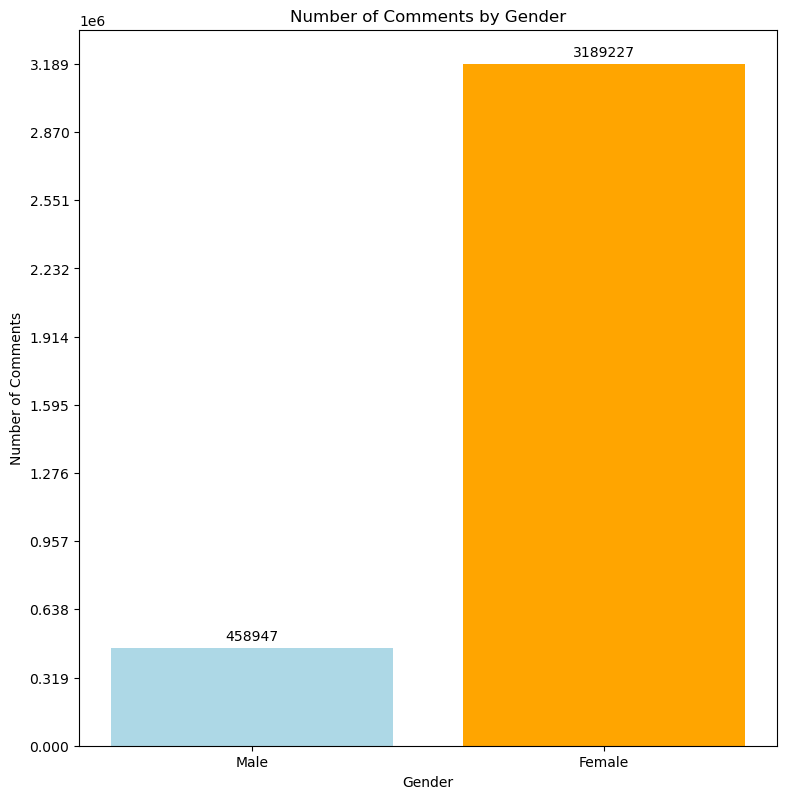

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def count_comments(filename):
    """Read the CSV file and count the number of rows."""
    data = pd.read_csv(filename, header=None)
    return len(data)

# Paths to the files
path_male = '/home/haters/Downloads/loaded_data/Combined_data_29Apr/combined_male_comments.csv'
path_female = "/home/haters/Downloads/loaded_data/Combined_data_29Apr/combined_female_comments.csv"

# Count the comments in each file
count_male = count_comments(path_male)
count_female = count_comments(path_female)

# Data for visualization
genders = ['Male', 'Female']
comments = [count_male, count_female]

# Create a bar chart
fig, ax = plt.subplots(figsize=(9, 4))
bars = ax.bar(genders, comments, color=['lightblue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Number of Comments')
plt.title('Number of Comments by Gender')

# Adjust the Y-axis ticks
plt.yticks(range(0, max(comments) + 1, max(comments) // 10))

# Adjust the layout to avoid any overlap
plt.subplots_adjust(top=1.9)

# Label each bar with the number of comments
for bar in bars:
    yval = bar.get_height()
    ax.annotate(f'{yval}',
                xy=(bar.get_x() + bar.get_width() / 2, yval),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plt.savefig("genderVis.png")
plt.show()


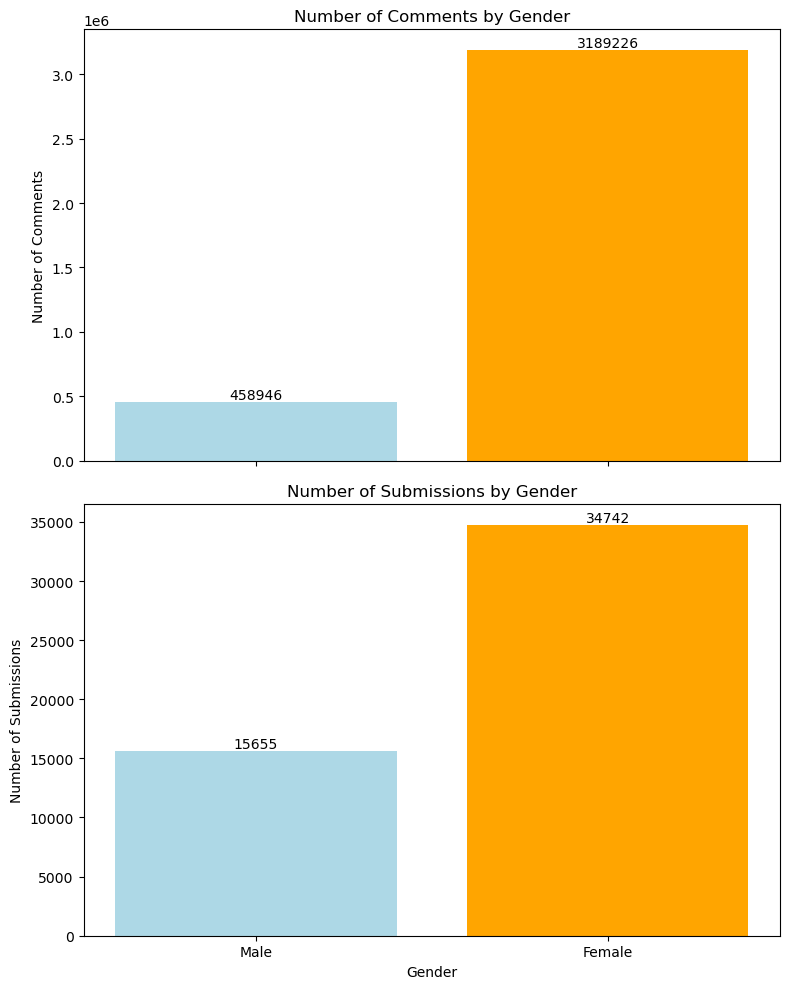

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def count_rows(filename):
    """Read the CSV file and count the number of rows."""
    data = pd.read_csv(filename, low_memory=False)
    return len(data)

def plot_gender_distribution(comments_male_path, comments_female_path, submissions_male_path, submissions_female_path):
    """Plot the distribution of comments and submissions for male and female datasets."""
    # Count the rows in each file
    count_male_comments = count_rows(comments_male_path)
    count_female_comments = count_rows(comments_female_path)
    count_male_submissions = count_rows(submissions_male_path)
    count_female_submissions = count_rows(submissions_female_path)

    # Data for visualization
    genders = ['Male', 'Female']
    comments = [count_male_comments, count_female_comments]
    submissions = [count_male_submissions, count_female_submissions]
    colors = ['lightblue', 'orange']  # Consistent color coding for male and female

    # Set up a figure with two subplots arranged vertically
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

    # Plot Comments Distribution
    ax1.bar(genders, comments, color=colors)
    ax1.set_title('Number of Comments by Gender')
    ax1.set_ylabel('Number of Comments')
    for i, value in enumerate(comments):
        ax1.text(i, value + 3, str(value), ha='center', va='bottom')

    # Plot Submissions Distribution
    ax2.bar(genders, submissions, color=colors)
    ax2.set_title('Number of Submissions by Gender')
    ax2.set_ylabel('Number of Submissions')
    ax2.set_xlabel('Gender')
    for i, value in enumerate(submissions):
        ax2.text(i, value + 3, str(value), ha='center', va='bottom')

    plt.xticks(rotation=0)  # Set rotation for x ticks if needed
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()

# Example usage:
plot_gender_distribution(
    '/home/haters/Downloads/loaded_data/Combined_data_29Apr/combined_male_comments.csv',
    '/home/haters/Downloads/loaded_data/Combined_data_29Apr/combined_female_comments.csv',
    '/home/haters/Downloads/loaded_data/Combined_data_29Apr/combined_male_submissions.csv',
    '/home/haters/Downloads/loaded_data/Combined_data_29Apr/combined_female_submissions.csv'
)


## Text Preprocessing

In [ ]:
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

In [ ]:
class TextPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.tokenizer = WordPunctTokenizer()

    def preprocess_text(self, text):
        """Processes the input text by lowering, removing punctuation, tokenizing, 
        removing stopwords, and lemmatizing the words.

        Args:
            text (str): Text to preprocess.

        Returns:
            list: List of preprocessed tokens.
        """
        text = text.lower()  # Lowercase text
        text = emoji.demojize(text)  # Convert emojis to text
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        tokens = self.tokenizer.tokenize(text)  # Tokenization
        tokens = [word for word in tokens if word not in self.stop_words and word.isalnum()]  # Stopword removal

        # Lemmatization
        tokens = [self.lemmatize_token(word) for word in tokens]
        return tokens

    def lemmatize_token(self, token):
        #Lemmatize the given token based on its POS tag
        tag = self.get_wordnet_pos(nltk.pos_tag([token])[0][1])
        return self.lemmatizer.lemmatize(token, pos=tag) if tag else token

    @staticmethod
    def get_wordnet_pos(treebank_tag):
        #Converts treebank tag to wordnet tag
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return None
            

In [ ]:
def preprocess(df, data_type):
    if data_type == 'comments':
        text = 'body'
    elif data_type == 'submissions':
        text = 'selftext'

    # Get the position of the 'body' or 'selftext' column 
    col_index = df.columns.get_loc(text) + 1 

    preprocessed_text = df[text].apply(preprocessor.preprocess_text)
    df.insert(col_index, 'preprocessed_txt', preprocessed_text)

    return df
    

In [ ]:
combined_male_test_submissions = preprocess(combined_male_test_submissions, 'submissions')
combined_male_test_submissions.head(10)

In [ ]:
combined_male_test_comments = preprocess(combined_male_test_comments, 'comments')
combined_male_test_comments.head(10)